In [1]:
#import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import sympy
from IPython.display import Image
from tqdm import trange

#Set up sympy to display outputs after a latex conversion.
from sympy.interactive import printing
printing.init_printing(use_latex=True)

# Import custom module
import SMB_Code_models_equilibria as models_equil

# 1 Where does an increase in $\epsilon$ cause a discontinuous increase in disease burden and what is the increase in disease burden.

In [2]:
param_values = {'N':1,'epsilon':0.4,'beta_W': 0.04 , 'beta_Z': 0.015,'gamma': 0.01,'gamma_T': 0.1}

100%|██████████████████████████████████████████████████████████████████████████████| 1001/1001 [01:43<00:00,  9.66it/s]


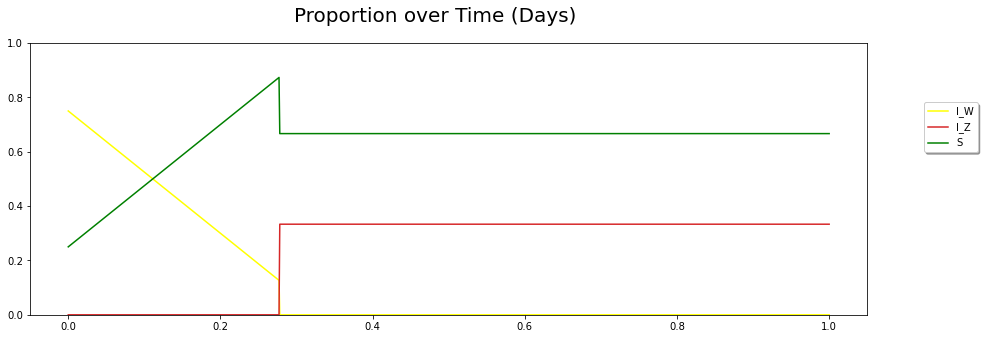

In [3]:
epsilon_vals = np. arange (0, 1.001, 0.001)
S_endem = []
I_W_endem = []
I_Z_endem = []

for i in trange(len(epsilon_vals)):
    param_values['epsilon']=epsilon_vals[i]
    prevs = models_equil.replace_inf_end_equil(param_values)
    S_endem.append(prevs[0]['S'])
    I_W_endem.append(prevs[0]['I_W'])
    I_Z_endem.append(prevs[0]['I_Z'])

fig = plt.figure(figsize=(15,5))

fig.suptitle('Proportion over Time (Days)', 
             fontsize=20)

ax = plt.subplot(111)
axes = plt.gca()
axes.set_ylim([0,1])

ax.plot(epsilon_vals,I_W_endem,color='yellow',label='I_W')
ax.plot(epsilon_vals,I_Z_endem,color='tab:red',label='I_Z')
ax.plot(epsilon_vals,S_endem,color='green',label='S')
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)
plt.show()

The jump in disease burden occurs when resistant strain endemic equilibrium becomes stable. So what is the first element of I_Z_endem to be >0.

In [4]:
I_Z_endem = np.array(I_Z_endem)
I_Z_endem

np.where(I_Z_endem>0)

(array([ 278,  279,  280,  281,  282,  283,  284,  285,  286,  287,  288,
         289,  290,  291,  292,  293,  294,  295,  296,  297,  298,  299,
         300,  301,  302,  303,  304,  305,  306,  307,  308,  309,  310,
         311,  312,  313,  314,  315,  316,  317,  318,  319,  320,  321,
         322,  323,  324,  325,  326,  327,  328,  329,  330,  331,  332,
         333,  334,  335,  336,  337,  338,  339,  340,  341,  342,  343,
         344,  345,  346,  347,  348,  349,  350,  351,  352,  353,  354,
         355,  356,  357,  358,  359,  360,  361,  362,  363,  364,  365,
         366,  367,  368,  369,  370,  371,  372,  373,  374,  375,  376,
         377,  378,  379,  380,  381,  382,  383,  384,  385,  386,  387,
         388,  389,  390,  391,  392,  393,  394,  395,  396,  397,  398,
         399,  400,  401,  402,  403,  404,  405,  406,  407,  408,  409,
         410,  411,  412,  413,  414,  415,  416,  417,  418,  419,  420,
         421,  422,  423,  424,  425, 

The values of $\epsilon$, $S$, $I_W$ and $I_Z$ at that point are equal to:

In [5]:
display(epsilon_vals[278],S_endem[278],I_W_endem[278],I_Z_endem[278])

Just before that point the values of $\epsilon$, $S$, $I_W$ and $I_Z$ are equal to:

In [6]:
display(epsilon_vals[277],S_endem[277],I_W_endem[277],I_Z_endem[277])

Meaning the jump is disease burden is:

In [7]:
S_endem[277]-S_endem[278]

## 2 Deriving equations for $\epsilon$ at the discontinuous increase of disease burden and the increase in Disease burden.

Lets look at the disease equalibria, assocaited Jacobian Matrix and Eigen values.

In [8]:
#Setup Symbols for Sympy
N, S, I_W, I_Z, beta_W, beta_Z, gamma, gamma_T, epsilon = sympy.symbols('N S I_W I_Z beta_W beta_Z gamma gamma_T epsilon')

Eqn_S = -beta_W/N*I_W*S-beta_Z/N*I_Z*S+gamma*(1-epsilon)*I_W+gamma_T*epsilon*I_W+gamma*I_Z
Eqn_I_W = beta_W/N*I_W*S-gamma*(1-epsilon)*I_W-gamma_T*epsilon*I_W+(beta_W/N-beta_Z/N)*I_W*I_Z
Eqn_I_Z = beta_Z/N*I_Z*S-gamma*I_Z+(beta_Z/N-beta_W/N)*I_W*I_Z

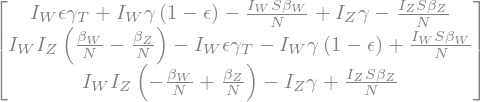

In [9]:
ODEs = sympy.Matrix([Eqn_S,Eqn_I_W,Eqn_I_Z])
ODEs

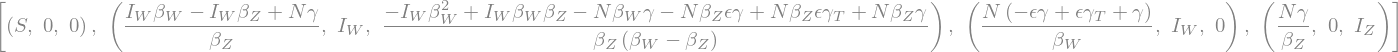

In [10]:
equilibria = sympy.solve(ODEs,[S, I_W, I_Z])
equilibria

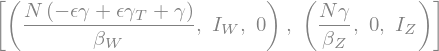

In [11]:
endem_equil = equilibria[-2:]
endem_equil

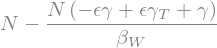

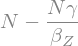

In [12]:
I_W_equil = N-endem_equil[0][0]
I_Z_equil = N-endem_equil[1][0]
display(I_W_equil,I_Z_equil)

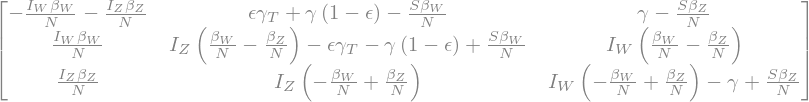

In [13]:
J_of_ODEs = ODEs.jacobian(X=[S,I_W,I_Z])
J_of_ODEs

Substitute the 2nd non-disease free equilibrium (non-DFE) into the Jacobian matrix and determine Eigen values.

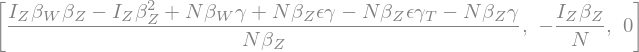

In [14]:
non_DFE_2 = {'S':equilibria[3][0],'I_W':equilibria[3][1],'I_Z':equilibria[3][2]}

J_of_ODEs_non_DFE_2 = J_of_ODEs.subs(non_DFE_2)
J_of_ODEs_non_DFE_2

eigs_J_non_DFE_2 = J_of_ODEs_non_DFE_2.eigenvals()
# The above code line enters the Eigen values as keys to a dictionary. 
# It would be more useful to have them as elements in a vector.
eigs_J_non_DFE_2 = [k  for  k in  eigs_J_non_DFE_2.keys()]
eigs_J_non_DFE_2

### 2.1 Deriving equation for $\epsilon$ at the discontinuous increase of disease burden

Model switches over between equilibrium when the 2nd equation in the set of eigen values = 0 so..

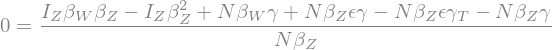

In [15]:
change_point_v2 = sympy.Eq(0,eigs_J_non_DFE_2[0])
display(change_point_v2)

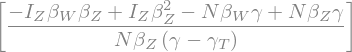

In [16]:
epsilon_at_change_v2 = sympy.solve(change_point_v2,epsilon)
epsilon_at_change_v2

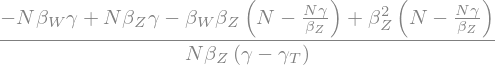

In [17]:
epsilon_at_change_v2=epsilon_at_change_v2[0]
epsilon_at_change_v2 = epsilon_at_change_v2.subs(I_Z,I_Z_equil)
epsilon_at_change_v2

In [18]:
epsilon_at_change_v2.subs(param_values)

Lets check this is the correct value

In [19]:
epsilon_vals[278]

In [20]:
param_values['epsilon']=epsilon_at_change_v2.subs(param_values)
param_values

{'N': 1,
 'epsilon': 0.277777777777778,
 'beta_W': 0.04,
 'beta_Z': 0.015,
 'gamma': 0.01,
 'gamma_T': 0.1}

Increase in disease burden in replacement model is:

In [21]:
models_equil.replace_inf_end_equil(param_values)

[{'S': 0.875000000000000, 'I_W': 0.125000000000000, 'I_Z': 0}]

This is indeed the correct value of $\epsilon$.

## 2.2 Deriving Equation for the Increase in Disease burden.

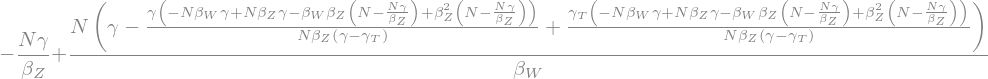

In [22]:
inc_burd = I_Z_equil - I_W_equil.subs(epsilon,epsilon_at_change_v2)
inc_burd

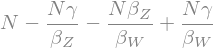

In [23]:
inc_burd=inc_burd.simplify()
inc_burd

In [24]:
inc_burd.subs(param_values)

Lets double check.

In [25]:
S_endem[277]-S_endem[278]

# 3 Checking working with different set of parameters.

100%|██████████████████████████████████████████████████████████████████████████████| 1001/1001 [01:39<00:00, 10.04it/s]


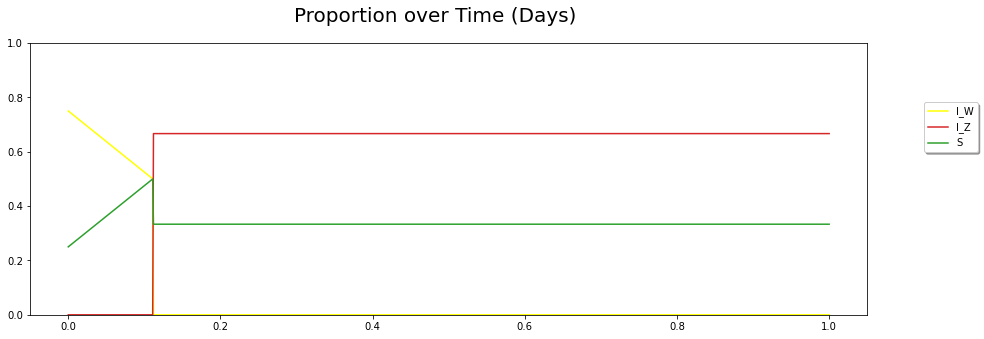

In [26]:
param_values = {'N':1,'epsilon':0.4,'beta_W': 0.04 , 'beta_Z': 0.03,'gamma': 0.01,'gamma_T': 0.1}

epsilon_vals = np. arange (0, 1.001, 0.001)
S_endem = []
I_W_endem = []
I_Z_endem = []

for i in trange(len(epsilon_vals)):
    param_values['epsilon']=epsilon_vals[i]
    prevs = models_equil.replace_inf_end_equil(param_values)
    S_endem.append(prevs[0]['S'])
    I_W_endem.append(prevs[0]['I_W'])
    I_Z_endem.append(prevs[0]['I_Z'])

fig = plt.figure(figsize=(15,5))

fig.suptitle('Proportion over Time (Days)', 
             fontsize=20)

ax = plt.subplot(111)
axes = plt.gca()
axes.set_ylim([0,1])

ax.plot(epsilon_vals,I_W_endem,color='yellow',label='I_W')
ax.plot(epsilon_vals,I_Z_endem,color='tab:red',label='I_Z')
ax.plot(epsilon_vals,S_endem,color='tab:green',label='S')
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)
plt.show()

The jump in disease burden occurs when resistant strain endemic equilibrium becomes stable. So what is the first element of I_Z_endem to be >0.

In [27]:
I_Z_endem = np.array(I_Z_endem)
I_Z_endem

np.where(I_Z_endem>0)

(array([ 112,  113,  114,  115,  116,  117,  118,  119,  120,  121,  122,
         123,  124,  125,  126,  127,  128,  129,  130,  131,  132,  133,
         134,  135,  136,  137,  138,  139,  140,  141,  142,  143,  144,
         145,  146,  147,  148,  149,  150,  151,  152,  153,  154,  155,
         156,  157,  158,  159,  160,  161,  162,  163,  164,  165,  166,
         167,  168,  169,  170,  171,  172,  173,  174,  175,  176,  177,
         178,  179,  180,  181,  182,  183,  184,  185,  186,  187,  188,
         189,  190,  191,  192,  193,  194,  195,  196,  197,  198,  199,
         200,  201,  202,  203,  204,  205,  206,  207,  208,  209,  210,
         211,  212,  213,  214,  215,  216,  217,  218,  219,  220,  221,
         222,  223,  224,  225,  226,  227,  228,  229,  230,  231,  232,
         233,  234,  235,  236,  237,  238,  239,  240,  241,  242,  243,
         244,  245,  246,  247,  248,  249,  250,  251,  252,  253,  254,
         255,  256,  257,  258,  259, 

The values of $\epsilon$, $S$, $I_W$ and $I_Z$ at that point are equal to:

In [28]:
display(epsilon_vals[112],S_endem[112],I_W_endem[112],I_Z_endem[112])

Just before that point the values of $\epsilon$, $S$, $I_W$ and $I_Z$ are equal to:

In [29]:
display(epsilon_vals[111],S_endem[111],I_W_endem[111],I_Z_endem[111])

Meaning the jump is disease burden is:

In [30]:
S_endem[111]-S_endem[112]

By derived calculation the the jump in deisease burden should occur when $\epsilon=$

In [31]:
epsilon_at_change_v2.subs(param_values)

The increase in disease burden should be:

In [32]:
inc_burd.subs(param_values)

All seems correct, minor differences can be put down to rounding errors and that epsilon was altered in increments of 0.001 when ploting graphs of stable endemic equilria.

# 4 Plots of cost of antimicrobial resistance (reduction in transmission 1-$\frac{\beta_Z}{\beta_W}$) against discontinuous increase in disease burden as a proportion of the population. (Figure 3)

In [33]:
param_values = {'N':1,'beta_W': 0.04 , 'beta_Z': 0.015,'gamma': 0.01,'gamma_T': 0.1}
dpi =96 # dpi for this screen is accoding to: https://www.infobyip.com/detectmonitordpi.php

Remember the $I_W$ strain's $R_0=\frac{\beta_Z}{\gamma}$. When $\beta_Z=0.25 \beta_W=0.01$ and $I_W$ strain's $R_0=1$, therefore we will not plot below $\beta_Z=0.25\beta_W=0.01$.

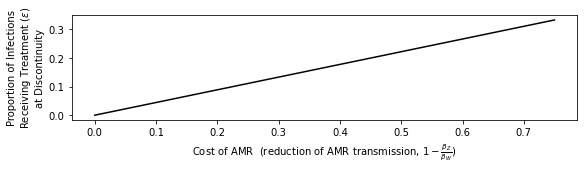

In [34]:
beta_Z_props = np. arange (int(25), int(101), int(1))
beta_Z_props = np.divide(beta_Z_props,100)
level_of_treatment = []

for prop in beta_Z_props:
    param_values['beta_Z']= param_values['beta_W']*prop
    epsilon = epsilon_at_change_v2.subs(param_values)
    level_of_treatment.append(epsilon)

fig_epsilon = plt.figure(figsize=(870/dpi, 185/dpi))

ax = plt.subplot(111)
axes = plt.gca()

ax.plot(np.subtract(1,beta_Z_props),level_of_treatment,color='black')
ax.set_xlabel(r'Cost of AMR  (reduction of AMR transmission, $1-\frac{\beta_Z}{\beta_W}$)')
ax.set_ylabel('Proportion of Infections\nReceiving Treatment ($\epsilon$)\nat Discontinuity')
plt.show()

In [35]:
fig_epsilon.savefig('Epsilon at disease jump v AMR to AMS transmission.png', bbox_inches='tight')

In [36]:
param_values = {'N':1,'beta_W': 0.04 , 'beta_Z': 0.015,'gamma': 0.01}

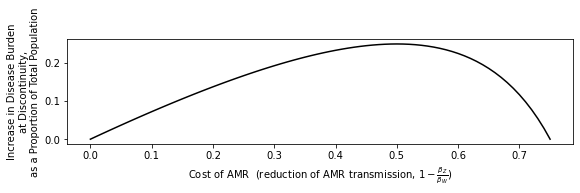

In [37]:
increases_in_burden = []

for prop in beta_Z_props:
    param_values['beta_Z']= param_values['beta_W']*prop
    increase = inc_burd.subs(param_values)
    increases_in_burden.append(increase)
    
fig_increase_burden = plt.figure(figsize=(870/dpi, 185/dpi))

ax = plt.subplot(111)
axes = plt.gca()

ax.plot(np.subtract(1,beta_Z_props),increases_in_burden,color='black')
ax.set_xlabel(r'Cost of AMR  (reduction of AMR transmission, $1-\frac{\beta_Z}{\beta_W}$)')
ax.set_ylabel('Increase in Disease Burden\nat Discontinuity,\nas a Proportion of Total Population')
plt.show()

In [38]:
fig_increase_burden.savefig('Increase in disease burden v AMR to AMS transmission.png', bbox_inches='tight')

In [39]:
np.where(beta_Z_props==0.9)[0][0]

65

In [40]:
display(increases_in_burden[np.where(beta_Z_props==0.9)[0][0]],level_of_treatment[np.where(beta_Z_props==0.9)[0][0]])

In [41]:
display(increases_in_burden[np.where(beta_Z_props==0.5)[0][0]],level_of_treatment[np.where(beta_Z_props==0.5)[0][0]])